In [1]:
pip install tensorflow

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Get the word index from the dataset
word_index = imdb.get_word_index()

# Reverse the word index to map indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decode a review (for example purposes)
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

# Preprocess the data
max_len = 100  # Trim reviews to this length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=1, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Make predictions on new data
sample_review = "This movie is fantastic! I loved every moment of it."
# Tokenize and pad the input sequence
tokenized_input = pad_sequences([[word_index[word] if word_index.get(word) else 0 for word in sample_review.split()]], maxlen=max_len)
# Predict sentiment
prediction = model.predict(tokenized_input)[0, 0]
sentiment = "Positive" if prediction > 0.5 else "Negative"
print(f'Sentiment: {sentiment}, Confidence: {prediction:.4f}')


782/782 [==============================] - 17s 22ms/step - loss: 0.3679 - accuracy: 0.8388
Test Loss: 0.3679, Test Accuracy: 0.8388
1/1 [==============================] - 0s 464ms/step
Sentiment: Positive, Confidence: 0.6370


In [16]:
import pandas as pd
import numpy as np

# Create a custom dataset
data = {
    'text': [
        "I love this product! It's amazing.",
        "The service was terrible. I won't come back.",
        "This movie is fantastic. I highly recommend it.",
        "The food at the restaurant was awful. I won't go there again.",
        "I'm satisfied with the quality of the service.",
        "The customer support team was unhelpful and rude.",
        "The book was a waste of time. I regret buying it.",
        "The concert was incredible. I had a great time.",
        "The delivery was delayed, and I'm not happy about it.",
        "The performance was disappointing. I expected better.",
    ],
    'label': [1, 0, 1, 0, 1, 0, 0, 1, 0, 0]  # 1 for positive, 0 for negative
}

# Create a DataFrame
df = pd.DataFrame(data)

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the dataset
print(df)

# Save the dataset to a CSV file
df.to_csv('sentiment_dataset.csv', index=False)




                                                text  label
0  The delivery was delayed, and I'm not happy ab...      0
1       The service was terrible. I won't come back.      0
2  The customer support team was unhelpful and rude.      0
3                 I love this product! It's amazing.      1
4    The concert was incredible. I had a great time.      1
5    This movie is fantastic. I highly recommend it.      1
6  The performance was disappointing. I expected ...      0
7     I'm satisfied with the quality of the service.      1
8  The food at the restaurant was awful. I won't ...      0
9  The book was a waste of time. I regret buying it.      0


In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split  # Add this import


# Load your custom dataset (replace 'your_dataset.csv' with your actual file)
df = pd.read_csv('/content/sentiment_dataset.csv')

# Display a few rows of your dataset
print(df.head())

# Preprocess the data
max_words = 10000
max_len = 100
embedding_dim = 50

# Tokenize the text
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df['text'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Build the sentiment analysis model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split the data into training and testing sets
X = padded_sequences
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Make predictions on new data
new_texts = ["I really enjoyed the movie!", "This was a terrible experience."]
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_len, padding='post', truncating='post')

predictions = model.predict(new_padded_sequences)
for i, text in enumerate(new_texts):
    sentiment = "Positive" if predictions[i][0] > 0.5 else "Negative"
    print(f'Text: "{text}", Predicted Sentiment: {sentiment}, Confidence: {predictions[i][0]:.4f}')


In [21]:
# pip install nltk

In [34]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Sample text data
data = {
    'text': [
        "I love this product! It's amazing.",
        "The service was terrible. I won't come back.",
        "This movie is fantastic. I highly recommend it.",
        "The food at the restaurant was awful. I won't go there again.",
        "I'm satisfied with the quality of the service.",
        "The customer support team was unhelpful and rude.",
        "The book was a waste of time. I regret buying it.",
        "The concert was incredible. I had a great time.",
        "The delivery was delayed, and I'm not happy about it.",
        "The performance was disappointing. I expected better.",
        "Japan Airlines Jet Catches Fire After Colliding With Coast Guard Plane",
        "Planes collide and catch fire at Japan airport; 5 dead, hundreds evacuated safely",
        "Passengers of Japanese plane speak out after fiery collision leaves 5 dead: 'It was hell'",
        "Tesla is getting beat by China's BYD on EV sales",
        "Watch Nicki Minaj Shut Down ‘Starships’ Performance on NYE",
        "‘Strongest’ solar flare since 2017 detected: Here’s what to know",
        "No need for No Labels if Nikki Haley takes the GOP nomination "
 ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment for each text
df['compound'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment based on compound score
df['sentiment'] = df['compound'].apply(lambda x: 'Positive' if x >= 0.05 else 'Negative' if x <= -0.05 else 'Neutral')

# Display the results
print(df[['text', 'compound', 'sentiment']])


                                                 text  compound sentiment
0                  I love this product! It's amazing.    0.8516  Positive
1        The service was terrible. I won't come back.   -0.4767  Negative
2     This movie is fantastic. I highly recommend it.    0.7501  Positive
3   The food at the restaurant was awful. I won't ...   -0.4588  Negative
4      I'm satisfied with the quality of the service.    0.4215  Positive
5   The customer support team was unhelpful and rude.   -0.0772  Negative
6   The book was a waste of time. I regret buying it.   -0.6808  Negative
7     The concert was incredible. I had a great time.    0.6249  Positive
8   The delivery was delayed, and I'm not happy ab...   -0.5991  Negative
9   The performance was disappointing. I expected ...   -0.0772  Negative
10  Japan Airlines Jet Catches Fire After Collidin...   -0.4404  Negative
11  Planes collide and catch fire at Japan airport...   -0.5859  Negative
12  Passengers of Japanese plane speak

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Sample text data
data = {
    'text': [
        "I love this product! It's amazing.",
        "The service was terrible. I won't come back.",
        "This movie is fantastic. I highly recommend it.",
        "The food at the restaurant was awful. I won't go there again.",
        "I'm satisfied with the quality of the service.",
        "The customer support team was unhelpful and rude.",
        "The book was a waste of time. I regret buying it.",
        "The concert was incredible. I had a great time.",
        "The delivery was delayed, and I'm not happy about it.",
        "The performance was disappointing. I expected better.",
        "Japan Airlines Jet Catches Fire After Colliding With Coast Guard Plane",
        "Planes collide and catch fire at Japan airport; 5 dead, hundreds evacuated safely",
        "Passengers of Japanese plane speak out after fiery collision leaves 5 dead: 'It was hell'"
 ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize the text
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['text'])

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_df['text'])
test_sequences = tokenizer.texts_to_sequences(test_df['text'])

# Pad sequences
max_len = max(len(seq) for seq in train_sequences)
train_padded = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

# Create an autoencoder model
embedding_dim = 50
autoencoder = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(embedding_dim, return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1, activation='sigmoid'))
])

autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the autoencoder
autoencoder.fit(train_padded, train_padded, epochs=5, batch_size=32, validation_data=(test_padded, test_padded))

# Use the encoder part to obtain embeddings
encoder_model = tf.keras.models.Sequential(autoencoder.layers[:-1])  # Remove the last layer
encoder_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Encode the text data
encoded_train = encoder_model.predict(train_padded)
encoded_test = encoder_model.predict(test_padded)

# Perform clustering or other unsupervised methods on the encoded data

# Display the encoded representations
print("Encoded Train Data:")
print(encoded_train)

print("\nEncoded Test Data:")
print(encoded_test)


In [28]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd

# Sample text data
data = {
    'text': [
        "I love this product! It's amazing.",
        "The service was terrible. I won't come back.",
        "This movie is fantastic. I highly recommend it.",
        "The food at the restaurant was awful. I won't go there again.",
        "I'm satisfied with the quality of the service.",
        "The customer support team was unhelpful and rude.",
        "The book was a waste of time. I regret buying it.",
        "The concert was incredible. I had a great time.",
        "The delivery was delayed, and I'm not happy about it.",
        "The performance was disappointing. I expected better.",
        "Japan Airlines Jet Catches Fire After Colliding With Coast Guard Plane",
        "Planes collide and catch fire at Japan airport; 5 dead, hundreds evacuated safely",
        "Passengers of Japanese plane speak out after fiery collision leaves 5 dead: 'It was hell'"
 ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Load the Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Generate embeddings for each text
df['embedding'] = df['text'].apply(lambda x: embed([x])[0].numpy())

# Display the results
print(df[['text', 'embedding']])


                                                 text  \
0                  I love this product! It's amazing.   
1        The service was terrible. I won't come back.   
2     This movie is fantastic. I highly recommend it.   
3   The food at the restaurant was awful. I won't ...   
4      I'm satisfied with the quality of the service.   
5   The customer support team was unhelpful and rude.   
6   The book was a waste of time. I regret buying it.   
7     The concert was incredible. I had a great time.   
8   The delivery was delayed, and I'm not happy ab...   
9   The performance was disappointing. I expected ...   
10  Japan Airlines Jet Catches Fire After Collidin...   
11  Planes collide and catch fire at Japan airport...   
12  Passengers of Japanese plane speak out after f...   

                                            embedding  
0   [0.0601516, 0.022074796, -0.045907367, 0.00377...  
1   [-0.039423667, -0.07652009, -0.040226262, -0.0...  
2   [0.055128247, 0.036327485, -0

                                                 text  \
0                  I love this product! It's amazing.   
1        The service was terrible. I won't come back.   
2     This movie is fantastic. I highly recommend it.   
3   The food at the restaurant was awful. I won't ...   
4      I'm satisfied with the quality of the service.   
5   The customer support team was unhelpful and rude.   
6   The book was a waste of time. I regret buying it.   
7     The concert was incredible. I had a great time.   
8   The delivery was delayed, and I'm not happy ab...   
9   The performance was disappointing. I expected ...   
10  Japan Airlines Jet Catches Fire After Collidin...   
11  Planes collide and catch fire at Japan airport...   
12  Passengers of Japanese plane speak out after f...   

                                            embedding  
0   [0.0601516, 0.022074796, -0.045907367, 0.00377...  
1   [-0.039423667, -0.07652009, -0.040226262, -0.0...  
2   [0.055128247, 0.036327485, -0

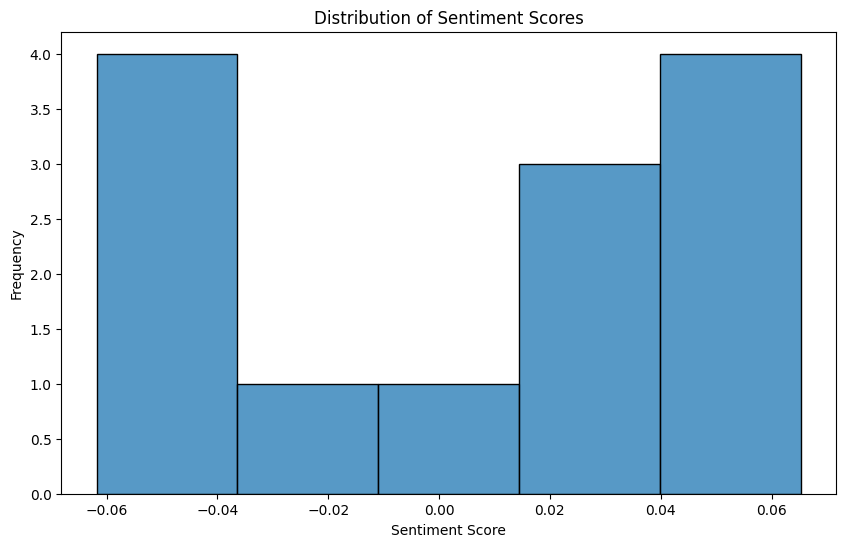

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the results
print(df[['text', 'embedding']])

# Examine the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['embedding'].apply(lambda x: x[0]))  # Assuming the first dimension of the embedding represents sentiment
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [27]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Sample text data
data = {
    'text': [
        "I love this product! It's amazing.",
        "The service was terrible. I won't come back.",
        "This movie is fantastic. I highly recommend it.",
        "The food at the restaurant was awful. I won't go there again.",
        "I'm satisfied with the quality of the service.",
        "The customer support team was unhelpful and rude.",
        "The book was a waste of time. I regret buying it.",
        "The concert was incredible. I had a great time.",
        "The delivery was delayed, and I'm not happy about it.",
        "The performance was disappointing. I expected better.",
        "Japan Airlines Jet Catches Fire After Colliding With Coast Guard Plane",
        "Planes collide and catch fire at Japan airport; 5 dead, hundreds evacuated safely",
        "Passengers of Japanese plane speak out after fiery collision leaves 5 dead: 'It was hell'"
 ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Load the Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Generate embeddings for each text
df['embedding'] = df['text'].apply(lambda x: embed([x])[0].numpy())

# Calculate cosine similarity between sentences
cosine_similarities = cosine_similarity(df['embedding'].tolist())

# Display the cosine similarity matrix
cosine_similarity_df = pd.DataFrame(cosine_similarities, columns=df['text'], index=df['text'])
print("Cosine Similarity Matrix:")
print(cosine_similarity_df)


Cosine Similarity Matrix:
text                                                I love this product! It's amazing.  \
text                                                                                     
I love this product! It's amazing.                                            1.000000   
The service was terrible. I won't come back.                                  0.047060   
This movie is fantastic. I highly recommend it.                               0.457559   
The food at the restaurant was awful. I won't g...                            0.089320   
I'm satisfied with the quality of the service.                                0.150664   
The customer support team was unhelpful and rude.                             0.011297   
The book was a waste of time. I regret buying it.                             0.248612   
The concert was incredible. I had a great time.                               0.245593   
The delivery was delayed, and I'm not happy abo...                        

In [36]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Sample text data
data = {
    'text': [
        "I love this product! It's amazing.",
        "The service was terrible. I won't come back.",
        "This movie is fantastic. I highly recommend it.",
        "The food at the restaurant was awful. I won't go there again.",
        "I'm satisfied with the quality of the service.",
        "The customer support team was unhelpful and rude.",
        "The book was a waste of time. I regret buying it.",
        "The concert was incredible. I had a great time.",
        "The delivery was delayed, and I'm not happy about it.",
        "The performance was disappointing. I expected better.",
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment and append scores to the DataFrame
df['sentiment_scores'] = df['text'].apply(lambda x: sia.polarity_scores(x))

# Extract compound score and sentiment label
df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])
df['sentiment'] = df['compound'].apply(lambda x: 'Positive' if x >= 0.05 else 'Negative' if x <= -0.05 else 'Neutral')

# Display the results
print(df[['text', 'compound', 'sentiment']])


                                                text  compound sentiment
0                 I love this product! It's amazing.    0.8516  Positive
1       The service was terrible. I won't come back.   -0.4767  Negative
2    This movie is fantastic. I highly recommend it.    0.7501  Positive
3  The food at the restaurant was awful. I won't ...   -0.4588  Negative
4     I'm satisfied with the quality of the service.    0.4215  Positive
5  The customer support team was unhelpful and rude.   -0.0772  Negative
6  The book was a waste of time. I regret buying it.   -0.6808  Negative
7    The concert was incredible. I had a great time.    0.6249  Positive
8  The delivery was delayed, and I'm not happy ab...   -0.5991  Negative
9  The performance was disappointing. I expected ...   -0.0772  Negative


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd

# Sample text data
data = {
    'text': [
        "I love this product! It's amazing.",
        "The service was terrible. I won't come back.",
        "This movie is fantastic. I highly recommend it.",
        "The food at the restaurant was awful. I won't go there again.",
        "I'm satisfied with the quality of the service.",
        "The customer support team was unhelpful and rude.",
        "The book was a waste of time. I regret buying it.",
        "The concert was incredible. I had a great time.",
        "The delivery was delayed, and I'm not happy about it.",
        "The performance was disappointing. I expected better.",
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Load the Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Generate embeddings for each text
df['embedding'] = df['text'].apply(lambda x: embed([x])[0].numpy())

# Create separate columns for each dimension in the embeddings
df = pd.concat([df, pd.DataFrame(df['embedding'].tolist(), columns=[f'dim_{i}' for i in range(512)])], axis=1)

# Display the results
print(df[['text'] + [f'dim_{i}' for i in range(512)]])


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd

# Sample text data
data = {
    'text': [
        "I love this product! It's amazing.",
        "The service was terrible. I won't come back.",
        "This movie is fantastic. I highly recommend it.",
        "The food at the restaurant was awful. I won't go there again.",
        "I'm satisfied with the quality of the service.",
        "The customer support team was unhelpful and rude.",
        "The book was a waste of time. I regret buying it.",
        "The concert was incredible. I had a great time.",
        "The delivery was delayed, and I'm not happy about it.",
        "The performance was disappointing. I expected better.",
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Load the Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Generate embeddings for each text
df['embedding'] = df['text'].apply(lambda x: embed([x])[0].numpy())

# Compute the mean sentiment score
df['sentiment_score'] = df['embedding'].apply(lambda emb: emb.mean())

# Display the results
print(df[['text', 'sentiment_score']])


In [54]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Sample text data
data = {
    'text': [
        "I love this product! It's amazing.",
        "The service was terrible. I won't come back.",
        "This movie is fantastic. I highly recommend it.",
        "The food at the restaurant was awful. I won't go there again.",
        "I'm satisfied with the quality of the service.",
        "The customer support team was unhelpful and rude.",
        "The book was a waste of time. I regret buying it.",
        "The concert was incredible. I had a great time.",
        "The delivery was delayed, and I'm not happy about it.",
        "The performance was disappointing. I expected better.",
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Load the Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Generate embeddings for each text
df['embedding'] = df['text'].apply(lambda x: embed([x])[0].numpy())

# Compute the mean sentiment score
df['sentiment_score'] = df['embedding'].apply(lambda emb: emb.mean())

# Display the results for Universal Sentence Encoder
print("Sentiment Score using Universal Sentence Encoder:")
print(df[['text', 'sentiment_score']])

# Using VADER for sentiment analysis
sia = SentimentIntensityAnalyzer()

# Compute sentiment scores using VADER
df['compound'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Display the results for VADER
print("\nSentiment Score using VADER:")
print(df[['text', 'compound']])
# # Define thresholds for sentiment categories
# positive_threshold = 0.1
# negative_threshold = -0.1

# # Classify as positive, neutral, or negative
# df['sentiment'] = pd.cut(df['sentiment_score'], bins=[float('-inf'), negative_threshold, positive_threshold, float('inf')],
#                          labels=['Negative', 'Neutral', 'Positive'])

# # Display the results
# print(df[['text', 'sentiment_score', 'sentiment']])


Sentiment Score using Universal Sentence Encoder:
                                                text  sentiment_score
0                 I love this product! It's amazing.         0.001189
1       The service was terrible. I won't come back.         0.000576
2    This movie is fantastic. I highly recommend it.         0.001428
3  The food at the restaurant was awful. I won't ...        -0.000877
4     I'm satisfied with the quality of the service.         0.000239
5  The customer support team was unhelpful and rude.         0.000478
6  The book was a waste of time. I regret buying it.         0.000020
7    The concert was incredible. I had a great time.         0.001803
8  The delivery was delayed, and I'm not happy ab...        -0.000038
9  The performance was disappointing. I expected ...        -0.000266

Sentiment Score using VADER:
                                                text  compound
0                 I love this product! It's amazing.    0.8516
1       The service was 